<a href="https://colab.research.google.com/github/Pasindu-Madhuwantha/Machine-Learning-Assignment/blob/IT20609030/2.%20notebooks/IT20609030/Logistic_Regression_Model_for_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📉📊📈**Stock Price Prediction Using Different Machine Learning Models and Compare the Performance of the Models**📉📊📈

Because of its complexity and difficulty, forecasting stock prices fascinates researchers and industry specialists from a variety of fields, including computer science, economics, business arithmetic, and marketing. Despite considerable attempts over the last decade, stock market price forecasting remains difficult due to the intrinsic random wandering nature of market prices. Stock price volatility creates significant challenges for precise forecasting. Nonetheless, establishing efficient and accurate forecasting models is critical for managers, investors, and decision-makers to make sound investment decisions. Analysts use machine learning techniques to evaluate historical data and uncover patterns and trends that might assist forecast future stock performance. Researchers try to create prediction models that can efficiently manage the unpredictable nature of stock markets by combining current and historical data.

# ✅ **Logistic Regression** ✅

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# MATPLOTLIB & SEABORN FOR GRAPH-PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Load Data into Data Frame**

In [4]:
import pandas as pd

# Path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/yahoo_data.csv'

# Read the CSV file into a DataFrame
dataset = pd.read_csv(file_path)

# Display the first few rows of the DataFrame and format the date column
dataset.head().style.format({'Date': lambda x: pd.to_datetime(x).strftime('%Y-%m-%d')})

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-28,"33,797.43","34,104.56","33,728.40","34,098.16","34,098.16","354,310,000"
1,2023-04-27,"33,381.66","33,859.75","33,374.65","33,826.16","33,826.16","343,240,000"
2,2023-04-26,"33,596.34","33,645.83","33,235.85","33,301.87","33,301.87","321,170,000"
3,2023-04-25,"33,828.34","33,875.49","33,525.39","33,530.83","33,530.83","297,880,000"
4,2023-04-24,"33,805.04","33,891.15","33,726.09","33,875.40","33,875.40","252,020,000"


# **Data Preprocessing**

In [5]:
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,-1)

In [7]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Buy_Sell
0,28-Apr-23,"33,797.43","34,104.56","33,728.40","34,098.16","34,098.16","354,310,000",-1
1,27-Apr-23,"33,381.66","33,859.75","33,374.65","33,826.16","33,826.16","343,240,000",-1
2,26-Apr-23,"33,596.34","33,645.83","33,235.85","33,301.87","33,301.87","321,170,000",1
3,25-Apr-23,"33,828.34","33,875.49","33,525.39","33,530.83","33,530.83","297,880,000",1
4,24-Apr-23,"33,805.04","33,891.15","33,726.09","33,875.40","33,875.40","252,020,000",-1


# **Dataset Cleaning and Null Value Testing**

In [8]:
# See how many null values in each column

dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Buy_Sell     0
dtype: int64

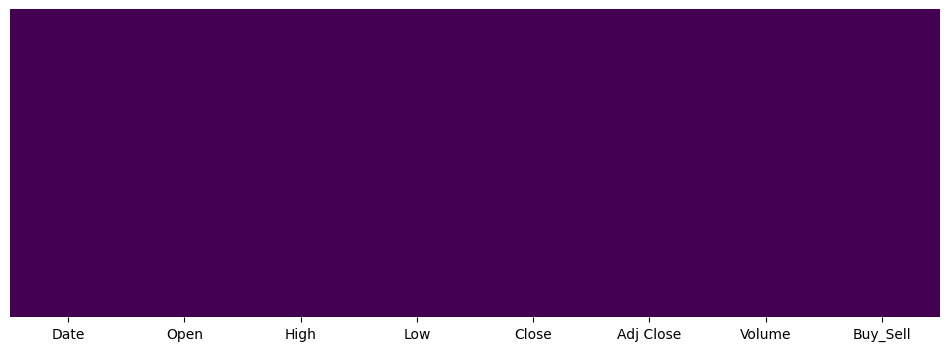

In [9]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("Figure 1: Heatmap for Null Values")